In [2]:
%autosave 25

Autosaving every 25 seconds


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

In [4]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

Create a dictionary representing the grid for the max_depth and n_estimators hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees

In [7]:
parameters = {'max_depth' : [3,6,9,12],
              'n_estimators' : [10,50,100,200]}

Instantiate a GridSearchCV object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set verbose=2 to see the output for each fit performed

In [8]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = rf, param_grid = parameters, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [9]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth'

In [10]:

gs_df = pd.DataFrame(gs.cv_results_)
gs_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.416329,0.037535,0.384434,0.094045,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.814390,0.819311,0.816690,0.822785,0.815006,0.817636,0.003088,12
1,2.062556,0.117241,0.058317,0.005996,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.812046,0.814390,0.814112,0.820675,0.813834,0.815011,0.002948,14
2,3.878792,0.280335,0.098446,0.004936,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.810640,0.812280,0.813174,0.819034,0.810317,0.813089,0.003152,16
3,7.505457,0.191138,0.196408,0.024681,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.811577,0.813218,0.813877,0.819972,0.813365,0.814402,0.002890,15
4,0.663850,0.029694,0.015497,0.002784,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.814390,0.820248,0.819737,0.825832,0.818288,0.819699,0.003691,10
5,3.207571,0.060603,0.067821,0.014787,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.815561,0.820951,0.819034,0.826067,0.820399,0.820402,0.003397,8
6,6.606282,0.260967,0.123247,0.014949,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.815796,0.820014,0.819269,0.827239,0.820164,0.820496,0.003726,6
7,12.722565,0.842396,0.242870,0.025899,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.815796,0.820717,0.818800,0.826770,0.819695,0.820355,0.003603,9
8,0.985631,0.032217,0.017293,0.001467,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.809702,0.816733,0.818331,0.827707,0.823447,0.819183,0.006123,11
9,4.454225,0.273616,0.072936,0.022099,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.815796,0.820248,0.820206,0.826067,0.821102,0.820684,0.003270,4


In [11]:
gs.best_params_

{'max_depth': 12, 'n_estimators': 200}

In [12]:
gs.best_score_

0.8215742346819184

In [13]:
gs.cv_results_

{'mean_fit_time': array([ 0.41632915,  2.06255565,  3.87879195,  7.50545702,  0.66385045,
         3.20757074,  6.60628223, 12.72256546,  0.98563051,  4.45422549,
         8.75007658, 16.61450357,  1.13394384,  4.74217639,  8.78285332,
        16.45679774]),
 'std_fit_time': array([0.03753529, 0.11724121, 0.28033547, 0.19113777, 0.02969416,
        0.06060313, 0.26096743, 0.8423956 , 0.03221716, 0.27361597,
        0.53315816, 1.11998126, 0.10547002, 0.52528012, 0.76471056,
        0.53988281]),
 'mean_score_time': array([0.38443384, 0.05831699, 0.09844604, 0.19640751, 0.01549678,
        0.06782084, 0.123247  , 0.24286985, 0.01729279, 0.07293615,
        0.17575679, 0.23076901, 0.02249956, 0.08258305, 0.14172697,
        0.25568156]),
 'std_score_time': array([0.09404499, 0.00599641, 0.00493642, 0.02468063, 0.00278385,
        0.01478744, 0.01494889, 0.02589867, 0.00146706, 0.02209866,
        0.02666348, 0.02997947, 0.00667056, 0.03180354, 0.02284692,
        0.04189473]),
 'param_ma

In [14]:
x,y = np.meshgrid(range(5), range(5))

In [21]:
color_map= plt.cm.viridis

Text(0, 0.5, 'Maximum depth')

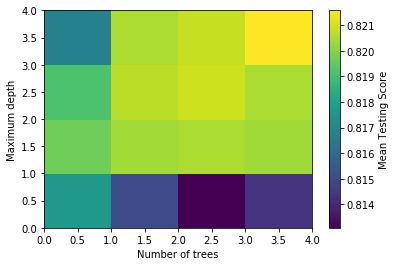

In [22]:
ax = plt.axes()
graph = ax.pcolormesh(x, y, gs_df['mean_test_score'].values.reshape((4,4)))
plt.colorbar(graph, label='Mean Testing Score')
ax.set_xlabel('Number of trees')
ax.set_ylabel('Maximum depth')

In [23]:
df.corr()['default payment next month']

LIMIT_BAL                    -0.154423
SEX                          -0.039945
EDUCATION                     0.034966
MARRIAGE                     -0.026030
AGE                           0.014334
PAY_1                         0.325365
PAY_2                         0.263649
PAY_3                         0.238085
PAY_4                         0.219889
PAY_5                         0.204948
PAY_6                         0.190182
BILL_AMT1                    -0.020508
BILL_AMT2                    -0.014579
BILL_AMT3                    -0.014649
BILL_AMT4                    -0.011349
BILL_AMT5                    -0.006753
BILL_AMT6                    -0.006274
PAY_AMT1                     -0.072431
PAY_AMT2                     -0.061555
PAY_AMT3                     -0.058010
PAY_AMT4                     -0.054572
PAY_AMT5                     -0.056651
PAY_AMT6                     -0.054838
default payment next month    1.000000
graduate school              -0.049595
high school              

In [24]:
gs.best_estimator_.feature_importances_

array([0.0598768 , 0.01245122, 0.00781853, 0.04287095, 0.30459238,
       0.05397308, 0.05202858, 0.04863935, 0.04617078, 0.04306215,
       0.04571771, 0.0605955 , 0.05169707, 0.04825381, 0.04249536,
       0.03998141, 0.03977532])

In [25]:
df_new = pd.DataFrame({'Feature name':features_response[:-1],
                      'Importance':gs.best_estimator_.feature_importances_})

In [26]:
df_new.sort_values('Importance',ascending=False)

,Feature name,Importance
4,PAY_1,0.304592
11,PAY_AMT1,0.060596
0,LIMIT_BAL,0.059877
5,BILL_AMT1,0.053973
6,BILL_AMT2,0.052029
12,PAY_AMT2,0.051697
7,BILL_AMT3,0.048639
13,PAY_AMT3,0.048254
8,BILL_AMT4,0.046171
10,BILL_AMT6,0.045718
